### import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'

### load  **Candy Power Ranking** dataset

In [3]:
df=pd.read_csv(url)
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### inspect the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


**The Candy Power Ranking** dataset contains 9 categorical variables **(chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus)**, 3 continuous variables **(sugarpercent, pricepercent, winpercent)**, and 1 nominal variable **competitorname**.

+ The dataset contains the following fields:

   + **chocolate**	Does it contain chocolate?
   + **fruity**	Is it fruit flavored?
   + **caramel**	Is there caramel in the candy?
   + **peanutalmondy**	Does it contain peanuts, peanut butter or almonds?
   + **nougat**	Does it contain nougat?
   + **crispedricewafer**	Does it contain crisped rice, wafers, or a cookie component?
   + **hard**	Is it a hard candy?
   + **bar**	Is it a candy bar?
   + **pluribus**	Is it one of many candies in a bag or box?
   + **sugarpercent**	The percentile of sugar it falls under within the data set.
   + **pricepercent**	The unit price percentile compared to the rest of the set.
   + **winpercent**	The overall win percentage 

For categorical variables, **0** signifies **does not contain that property**,' while **1** indicates **contains that property**

# Exploratory Data Analysis (EDA)

### check dimension of the dataset

In [5]:
df.shape

(85, 13)

dataset contains 85 rows and 13 columns

### check for missing or null values

In [6]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

there is no **missing** **null** values :)

### check for duplicate values

In [7]:
df.duplicated().sum()

0

the dataset is seemed to be already cleaned. so we do not need to clean the dataset.:)

### descriptive statistics on continuous variables

In [8]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800
pricepercent,85.0,0.468882,0.285740,0.011000,0.255000,0.465000,0.651000,0.97600
winpercent,85.0,50.316764,14.714357,22.445341,39.141056,47.829754,59.863998,84.18029


### descriptive statistics on categorical variables

In [9]:
cols=df.columns.tolist() ## cols stores all the column names.

In [10]:
df[[col for col in cols if col not in ['sugarpercent','pricepercent','winpercent',
                                       'competitorname']]].astype('object').describe().T 
## converting int->object in order to perform describe method on categorical variables

,count,unique,top,freq
chocolate,85,2,0,48
fruity,85,2,0,47
caramel,85,2,0,71
peanutyalmondy,85,2,0,71
nougat,85,2,0,78
crispedricewafer,85,2,0,78
hard,85,2,0,70
bar,85,2,0,64
pluribus,85,2,1,44


Most of the candies do not have the given properties except for **pluribus**.

checking for **outlier** in **sugarpercent** and **pricepercent**

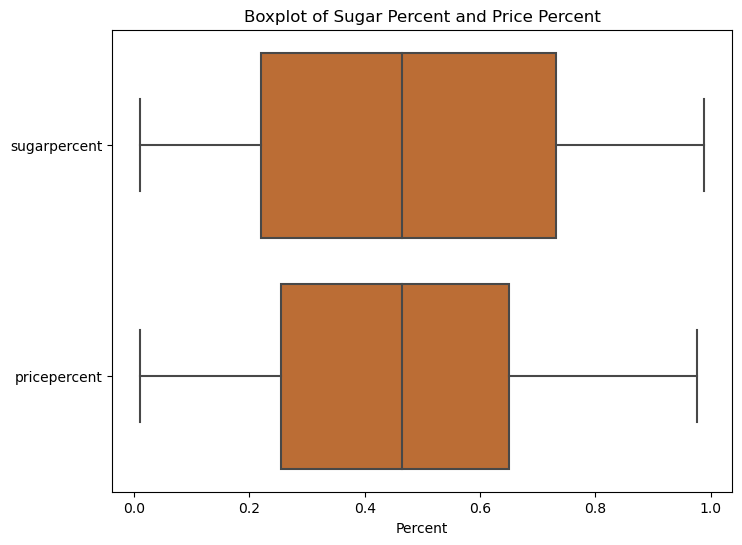

In [11]:
data = {
    'sugarpercent': df['sugarpercent'],
    'pricepercent': df['pricepercent']
}
df_box = pd.DataFrame(data)
# Creating a horizontal boxplot for both variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_box, orient='h',color='chocolate')
plt.title('Boxplot of Sugar Percent and Price Percent')
plt.xlabel('Percent')
plt.show()

there is no **outlier**

### Let's examine the seven most popular and seven least popular candies.

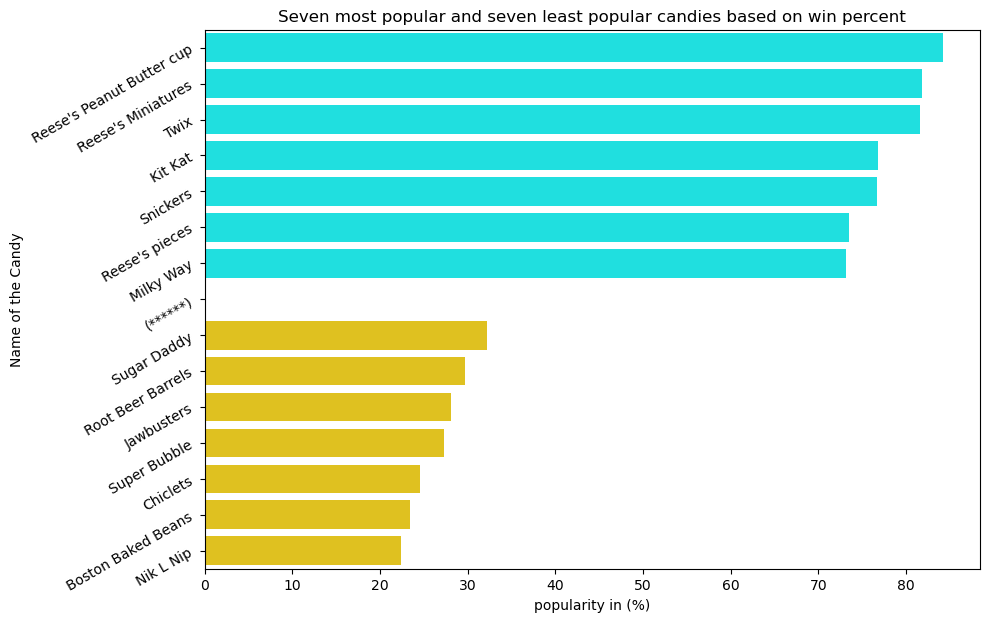

In [12]:
plt.figure(figsize=(10, 7))
sorted_df=df.sort_values(by='winpercent',ascending=False)
sns.barplot(data=pd.concat([sorted_df.head(7),pd.DataFrame({'competitorname':['(******)'],'winpercent':[0]}),
     sorted_df.tail(7)]),x='winpercent',y='competitorname',palette=['#00FFFF']*7 +['white']+ ['#FFD700']*7)
plt.xlabel('popularity in (%)')
plt.ylabel('Name of the Candy')
plt.yticks(rotation=30)
plt.title("Seven most popular and seven least popular candies based on win percent")
plt.show()

+ **Reese's Peanut Butter cup** is the most popular Candy with the winpercent of more than $80\%$.
+ **Nik L Nip** is the least popular Candy with the winpercent of almost $20\%$.

## Let's create visualizations highlighting the distinguishing characteristics that contribute to a candy's popularity, whether it ranks among the most favored or least favored.

In [13]:
cat_vars=["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus"]
cont_vars=['sugarpercent','pricepercent','winpercent']

In [14]:
# function to visualize the properties of  most and least 15 popular Candies.
def visualize_most_least_popular_candies(df_l,type):
    fig, ax = plt.subplots(4, 3, figsize=(13, 13))
    axes = ax.flatten()
    idx = 0
    for i in range(3):
        for j in range(3):  
            if idx < len(cat_vars):
                sns.countplot(x=cat_vars[idx], data=df_l, ax=ax[i, j], palette='rocket_r')
                axes[idx].set_title(f'Is {cat_vars[idx]} ?')
                axes[idx].set_ylabel('Count')
                counts = df_l[cat_vars[idx]].value_counts(normalize=True) * 100
                no_percent = counts[0] if 0 in counts.index else 0
                yes_percent = counts[1] if 1 in counts.index else 0
                axes[idx].set_xticks([0, 1])
                axes[idx].set_xticklabels([f"No ({no_percent:.2f}%)", f"Yes ({yes_percent:.2f}%)"], rotation=45)
            else:
                # Hide the empty subplot
                ax[i, j].axis('off')
            idx += 1
    # Plot histograms for continuous variables
    sns.histplot(df_l['sugarpercent'], ax=ax[3, 0], kde=True, color='#FFD700')
    ax[3, 0].set_title('Sugar Percent Distribution')
    ax[3, 0].set_xlabel('Sugar Percent')

    sns.histplot(df_l['pricepercent'], ax=ax[3, 1], kde=True, color='#FFD700')
    ax[3, 1].set_title('Price Percent Distribution')
    ax[3, 1].set_xlabel('Price Percent')

    # Hide the empty subplot
    ax[3, 2].axis('off')

    plt.suptitle(f'Properties of {type} popular 25 Candies.')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

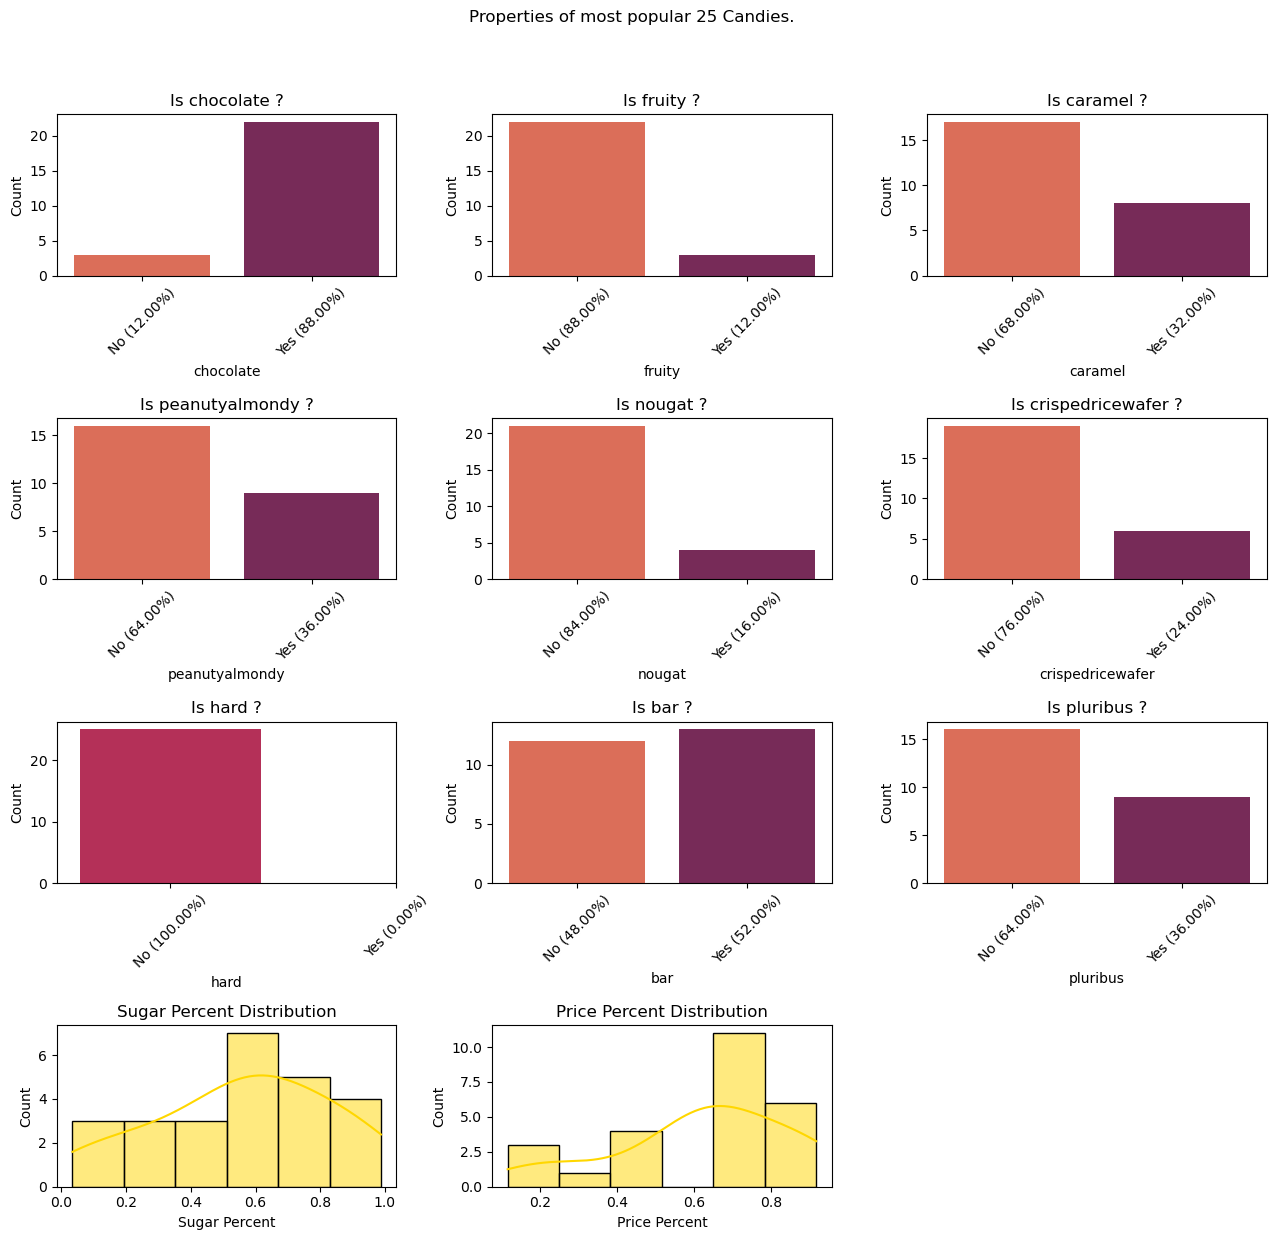

In [15]:
visualize_most_least_popular_candies(df.sort_values(by="winpercent",ascending=False).iloc[:25,:],"most")

### Analysis of Top 27 Candies:
   + The majority $(88\%)$ of the most popular candies feature **chocolate**, while only a small proportion $(12\%)$ include **fruity** flavors.
   + None of these top-ranked candies belong to the category of **hard** candies.
   + Approximately half $(52\%)$ of them are Candy **bars**.
   + Between $15\%$ to $30\%$ of these candies contain **pluribus**, **nougat**, **caramel**, **peanutyalmondy**, and **crispedricewafer**, showing a relatively limited presence of these particular ingredients among the selection.
   + Additionally, these popular candies exhibit characteristics of high **sugar conten**t and a tendency towards      **higher pricing**.

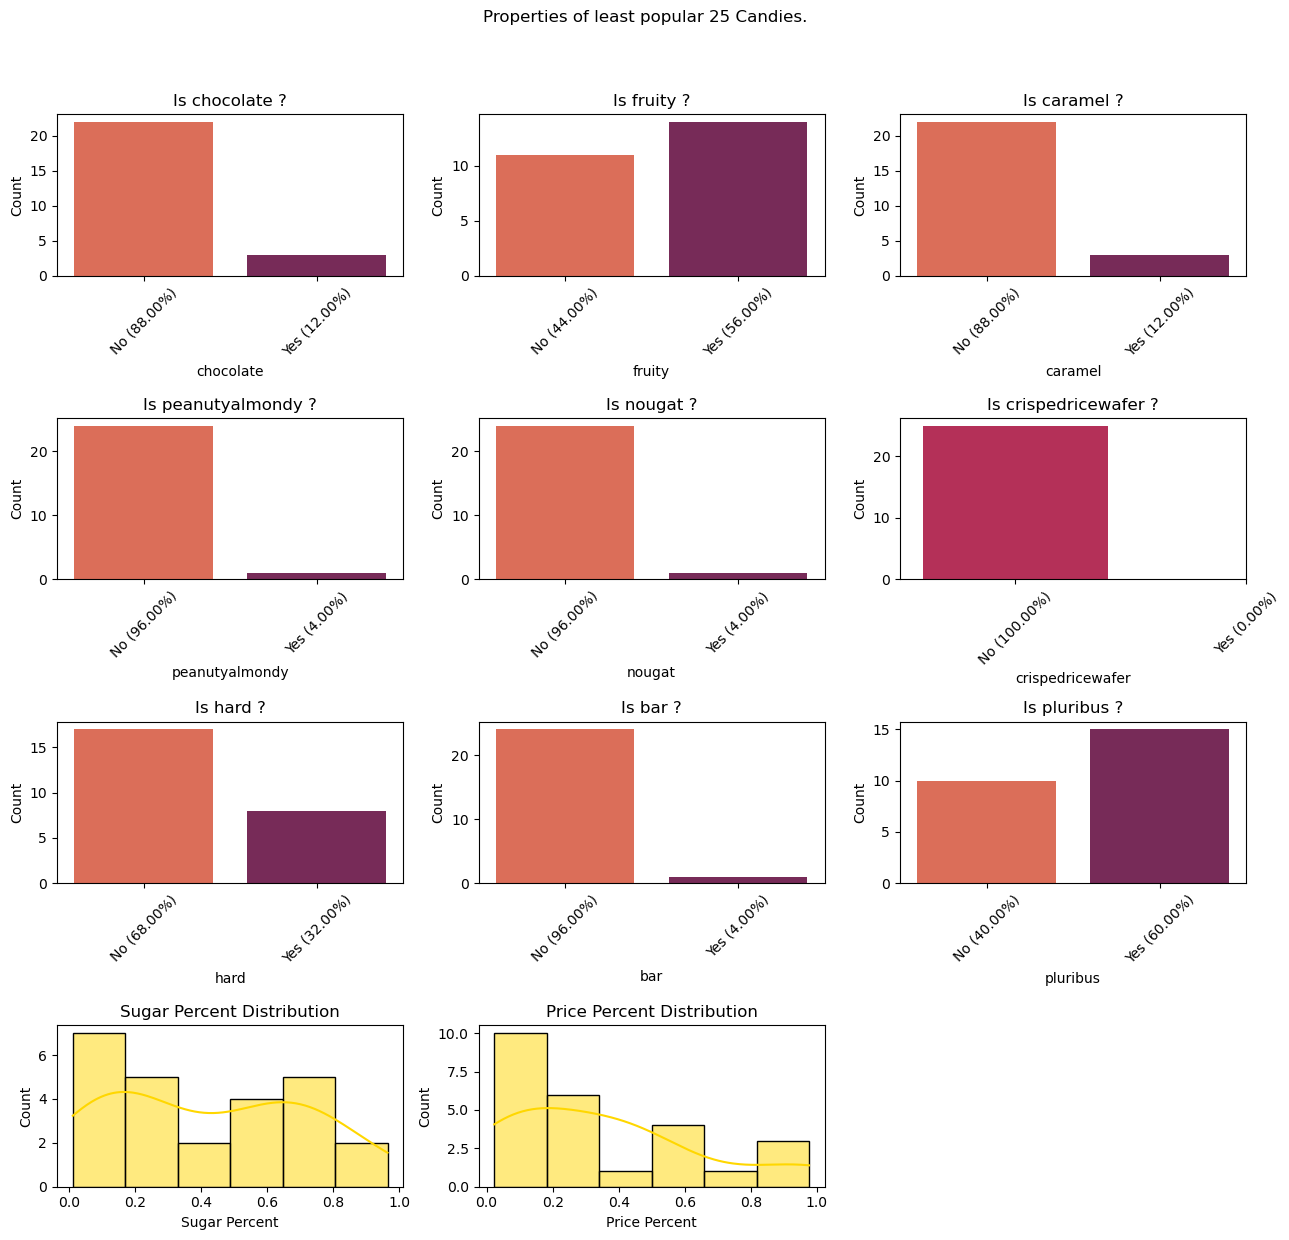

In [16]:
visualize_most_least_popular_candies(df.sort_values(by="winpercent",ascending=True).iloc[:25,:],"least")

### Analysis of Bottom 27 Candies:
 + Examining the least popular 27 candies reveals stark differences compared to the top 27 candies.

 + Only a small percentage (12%) of the least popular candies feature chocolate, while a majority (56%) incorporate fruity flavors.

 + The majority of these less favored candies do not fall under the category of hard candies. Merely 4% of them are Candy bars.

+ Moreover, these less popular candies also display a limited presence of ingredients such as pluribus, nougat, caramel, peanutyalmondy, and crispedricewafer.

+ Interestingly, these less popular candies tend to have lower sugar content and are priced relatively lower.

**In summary**, popular candies often feature chocolate, exclude hard candies, and lean towards Candy bars. They may include certain ingredients but tend to have higher sugar content and pricing. On the other hand, less popular candies commonly incorporate fruity flavors, fewer Candy bar variations, and generally have lower sugar content and pricing.

#### To facilitate broader analysis, let's transform the continuous variable 'winpercent' into a categorical variable with three classes: 'low winpercent,' 'medium winpercent,' and 'high winpercent.' This categorization will allow for a more generalized evaluation of the data.

In [17]:
df['winpercent'].describe()

count    85.000000
mean     50.316764
std      14.714357
min      22.445341
25%      39.141056
50%      47.829754
75%      59.863998
max      84.180290
Name: winpercent, dtype: float64

In [18]:
# convert winpercent from continous->categorical variable
def convert_winpercent_to_cat(x):
    if x>=22.44 and x<43:
        return 'low'
    elif x>=43 and x<66:
        return 'medium'
    return 'high'

In [19]:
df['winpercent_class']=df['winpercent'].apply(convert_winpercent_to_cat)

###  distribution of winpercent in three categories

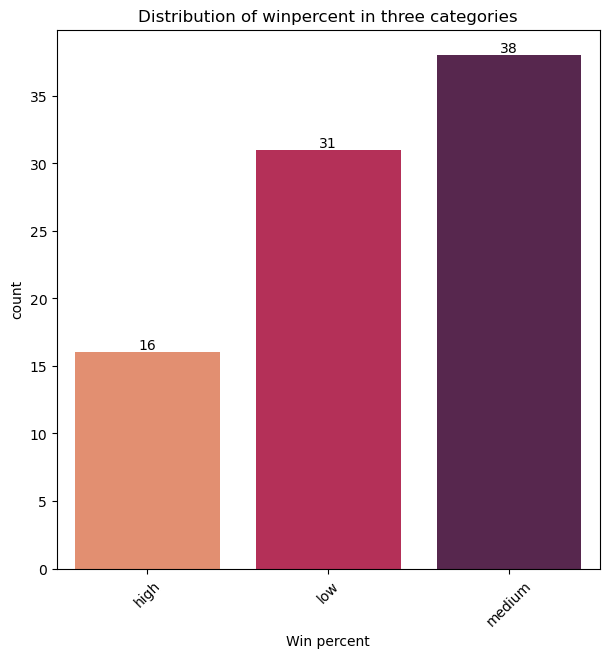

In [20]:
plt.figure(figsize=(7, 7))
ax=sns.countplot(x='winpercent_class', data=df, palette='rocket_r')
plt.xticks(rotation=45)
plt.title("Distribution of winpercent in three categories")
plt.xlabel("Win percent")
ax.bar_label(ax.containers[0])
plt.show()

+ We notice that $44.7\%$ of the candies fall within the medium winpercent category, while $18.82\%$ belong to the high winpercent category.

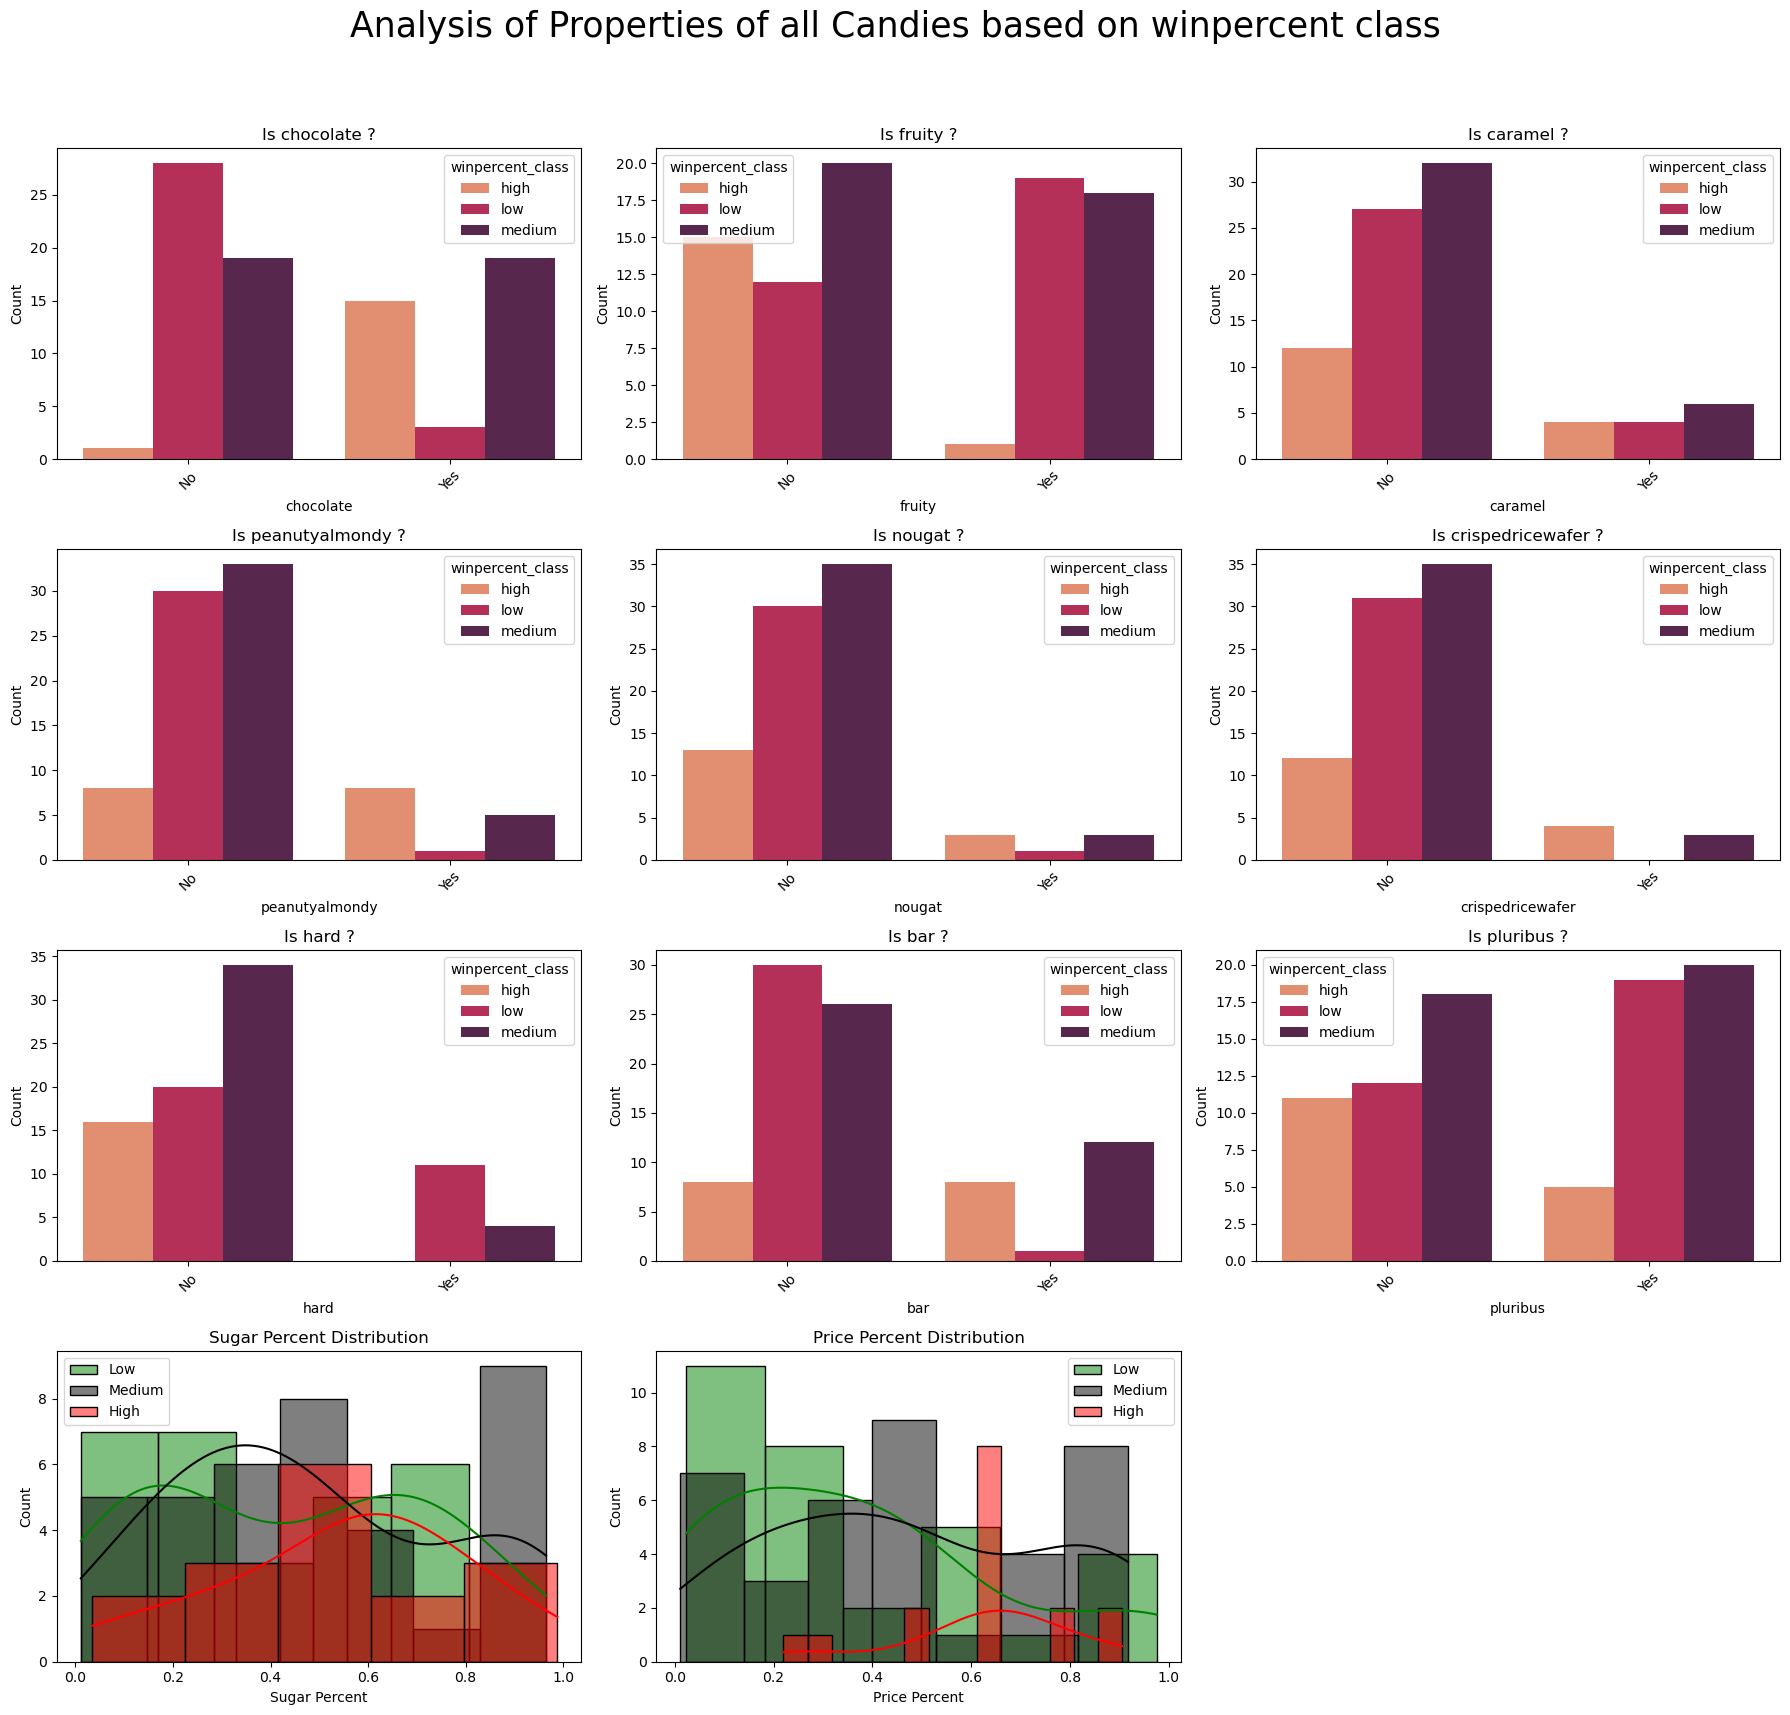

In [21]:

fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=df, ax=ax[i, j], palette='rocket_r', hue='winpercent_class')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels(['No','Yes'], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'winpercent_class'
for cls, color in zip(['low', 'medium', 'high'], ['green', 'black', 'red']):
    sns.histplot(df[df['winpercent_class'] == cls]['sugarpercent'], ax=ax[3, 0], kde=True, color=color, label=cls.capitalize())
    sns.histplot(df[df['winpercent_class'] == cls]['pricepercent'], ax=ax[3, 1], kde=True, color=color, label=cls.capitalize())

ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')
ax[3, 0].legend()
ax[3, 1].legend()

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Analysis of Properties of all Candies based on winpercent class',fontsize=25,color='black')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Exploration of Candy Properties Across Three Categories:
  + The majority of candies with medium and high winpercent exhibit the characteristic of being **chocolate-based**.

## Utilize a machine learning model to gain deeper insights or a more comprehensive understanding.

### Data Preprocessing:

Splitting into features and target variable

In [22]:
columns=cat_vars + cont_vars
columns.pop()
columns

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']

In [23]:
X=df[columns] ## independent variables
Y=df['winpercent'] ## dependent or target variable


Given the absence of missing or duplicate values in our dataset, there's no immediate need for data cleaning procedures. Moreover, our categorical variables are already in a normalized form, which is advantageous. To enhance the accuracy of our model, we can apply the <code>StandardScaler</code> method specifically to the 'pricepercent' and 'sugarpercent' variables for scaling purposes.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['sugarpercent', 'pricepercent']] = scaler.fit_transform(X[['sugarpercent', 'pricepercent']])

/tmp/ipykernel_25236/1820207239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['sugarpercent', 'pricepercent']] = scaler.fit_transform(X[['sugarpercent', 'pricepercent']])


### Split data into training and testing sets
  I want to use $75\%$ data for training purpose and rest for the testing purpose.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
X_train.shape, X_test.shape

((63, 11), (22, 11))

### Model Selection

Our objective is not centered around predicting **winpercent**; instead, we aim to ascertain the significance of each variable in relation to **winpercent**. Given the presence of numerous categorical variables in our dataset, I intend to utilize the <code>RandomForestRegressor</code> model as a starting point.

####  fit the model

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

#### model evaluation

In [28]:
from sklearn.metrics import r2_score
# Predict on the test set
Y_pred = rf.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(Y_test, Y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.3356340723284029


the **R-squared** value suggests a moderate level of predictive power for RandomForestRegressor model.

In [29]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.901261,1.376914
1,1,0,0,0,1,0,0,1,0,0.445922,0.148273
2,0,0,0,0,0,0,0,0,0,-1.663576,-1.242308
3,0,0,0,0,0,0,0,0,0,-1.663576,0.148273
4,0,1,0,0,0,0,0,0,0,1.520236,0.148273
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,-0.920093,-1.242308
81,0,1,0,0,0,0,1,0,0,-1.371875,-1.242308
82,0,1,0,0,0,0,0,0,1,-0.589262,-0.548778
83,0,0,1,0,0,0,1,0,0,-1.041043,-0.710719


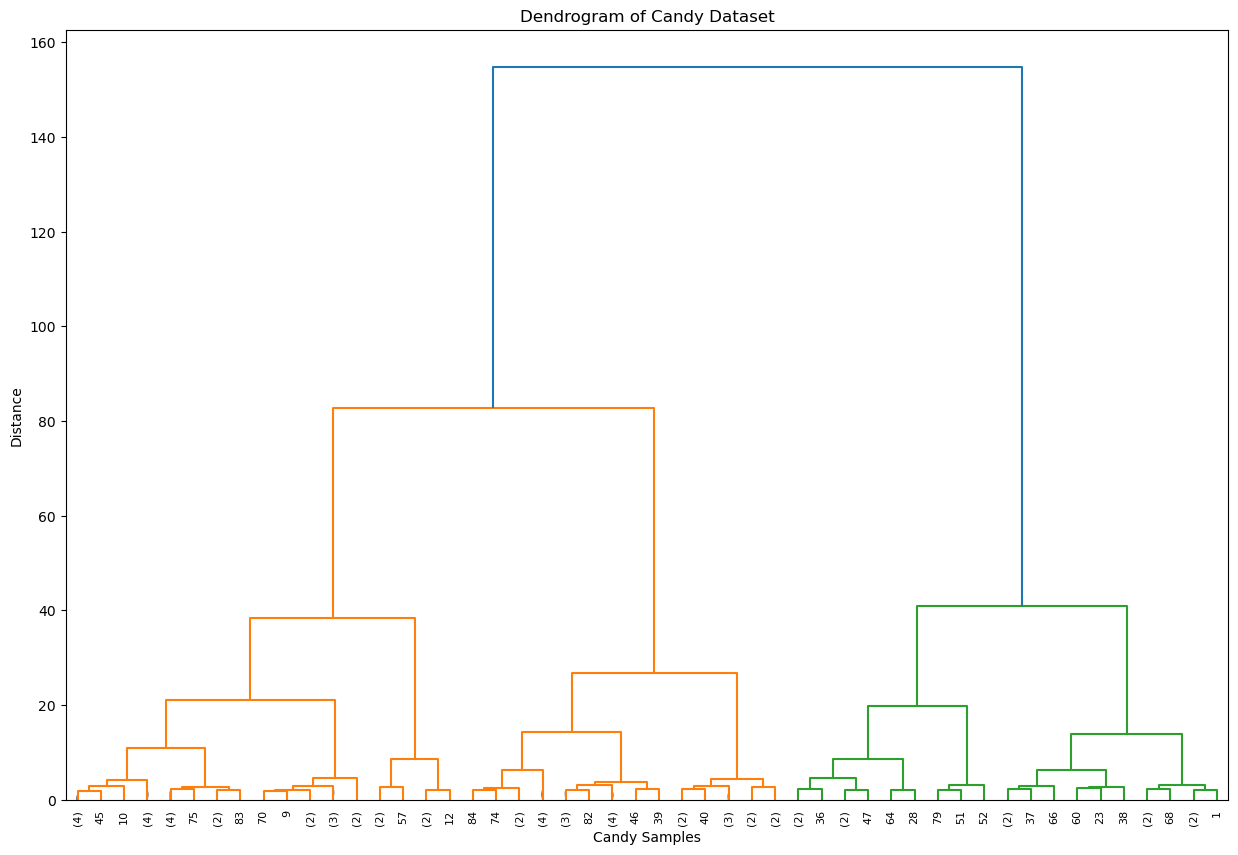

In [30]:

from scipy.cluster.hierarchy import dendrogram, linkage



# Selecting relevant columns for clustering
X = df.iloc[:, 1:-1].values  # Excluding 'competitorname' and 'winpercent' columns

# Applying hierarchical/agglomerative clustering using linkage and defining the method (e.g., 'ward')
linked = linkage(X, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=50,  # Adjust the number of leaf nodes to display
           leaf_rotation=90.,
           leaf_font_size=8.,
           show_contracted=True)
plt.title('Dendrogram of Candy Dataset')
plt.xlabel('Candy Samples')
plt.ylabel('Distance')
plt.show()


In [31]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Selecting relevant columns for clustering
X = df.iloc[:, 1:-1].values  # Excluding 'competitorname' and 'winpercent' columns

# Applying hierarchical/agglomerative clustering using linkage and defining the method (e.g., 'ward')
linked = linkage(X, 'ward')

# Determine clusters using fcluster
# You need to specify a criterion (e.g., max_d or number of clusters)
max_d = 50  # Define the maximum distance to cut the dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Add a new column 'class' to the dataframe to store the cluster numbers
df['class'] = clusters

# Displaying the count of unique clusters
print(df['class'].value_counts())

# Displaying the updated dataset with the 'class' column
print(df.head())  # Display the first few rows to check the updated dataset


3    33
2    28
1    24
Name: class, dtype: int64
  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent winpercent_class  class  
0   66.971725             high      1  
1   

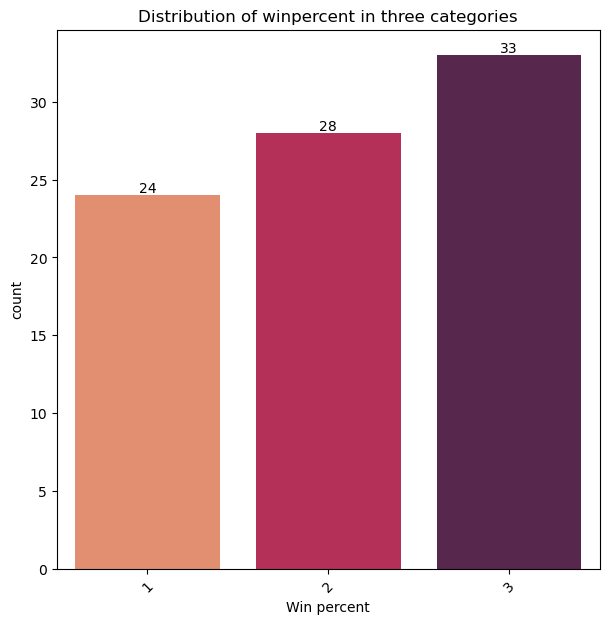

In [32]:
plt.figure(figsize=(7, 7))
ax=sns.countplot(x='class', data=df, palette='rocket_r')
plt.xticks(rotation=45)
plt.title("Distribution of winpercent in three categories")
plt.xlabel("Win percent")
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
df['class']=df['class'].map({1:'high',2:'medium',3:'low'})

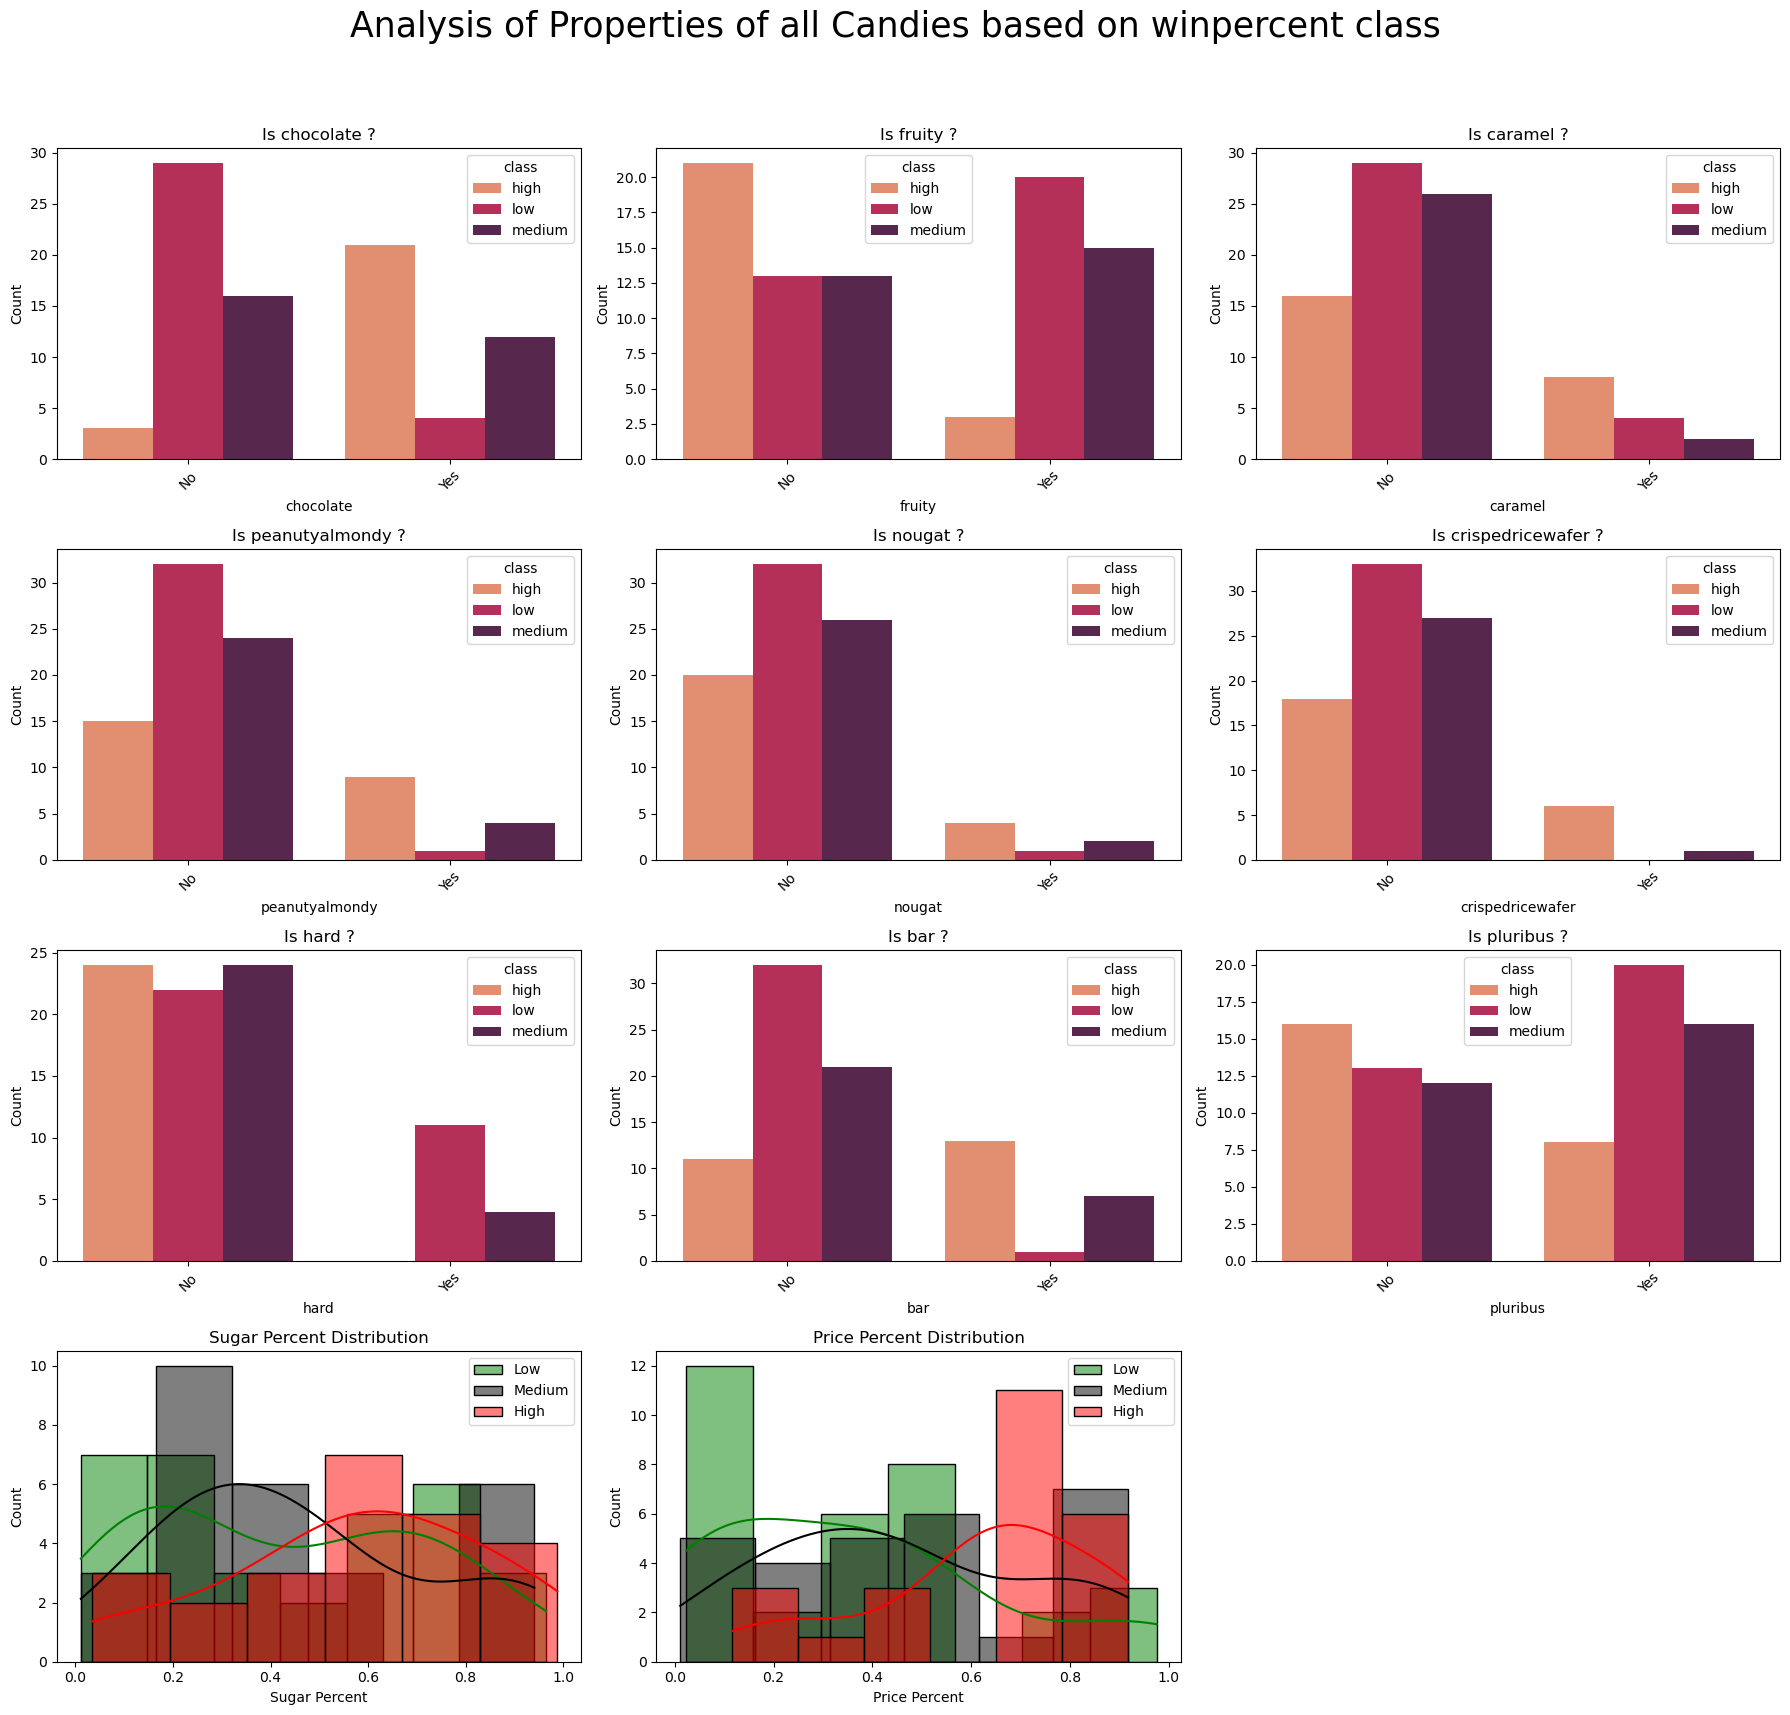

In [34]:

fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=df, ax=ax[i, j], palette='rocket_r', hue='class')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels(['No','Yes'], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'winpercent_class'
for cls, color in zip(['low', 'medium', 'high'], ['green', 'black', 'red']):
    sns.histplot(df[df['class'] == cls]['sugarpercent'], ax=ax[3, 0], kde=True, color=color, label=cls.capitalize())
    sns.histplot(df[df['class'] == cls]['pricepercent'], ax=ax[3, 1], kde=True, color=color, label=cls.capitalize())

ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')
ax[3, 0].legend()
ax[3, 1].legend()

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Analysis of Properties of all Candies based on winpercent class',fontsize=25,color='black')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
columns

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']

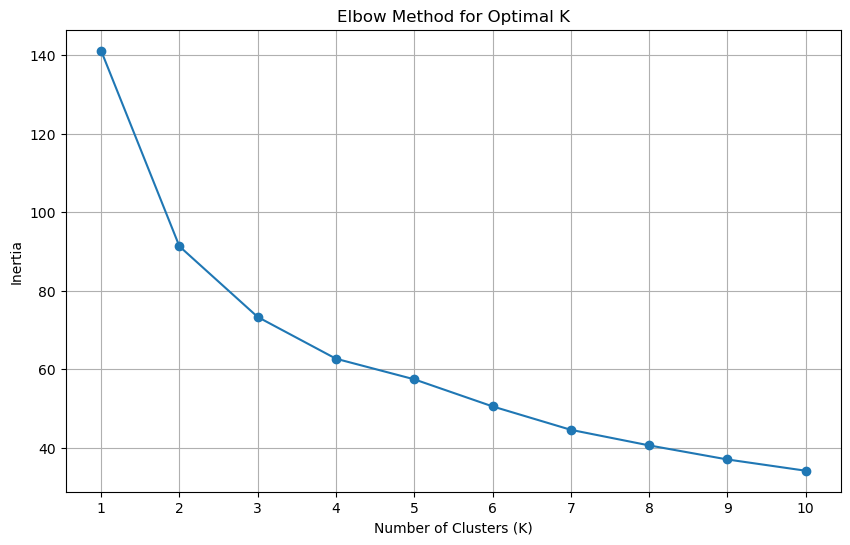

In [38]:

from sklearn.cluster import KMeans

# Fit KMeans for different K values and compute inertia (sum of squared distances to the closest centroid)
inertia = []
k_values = range(1, 11)  # Trying K values from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[columns])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph to determine the optimal K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[columns])

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original dataframe
df['Cluster'] = cluster_labels

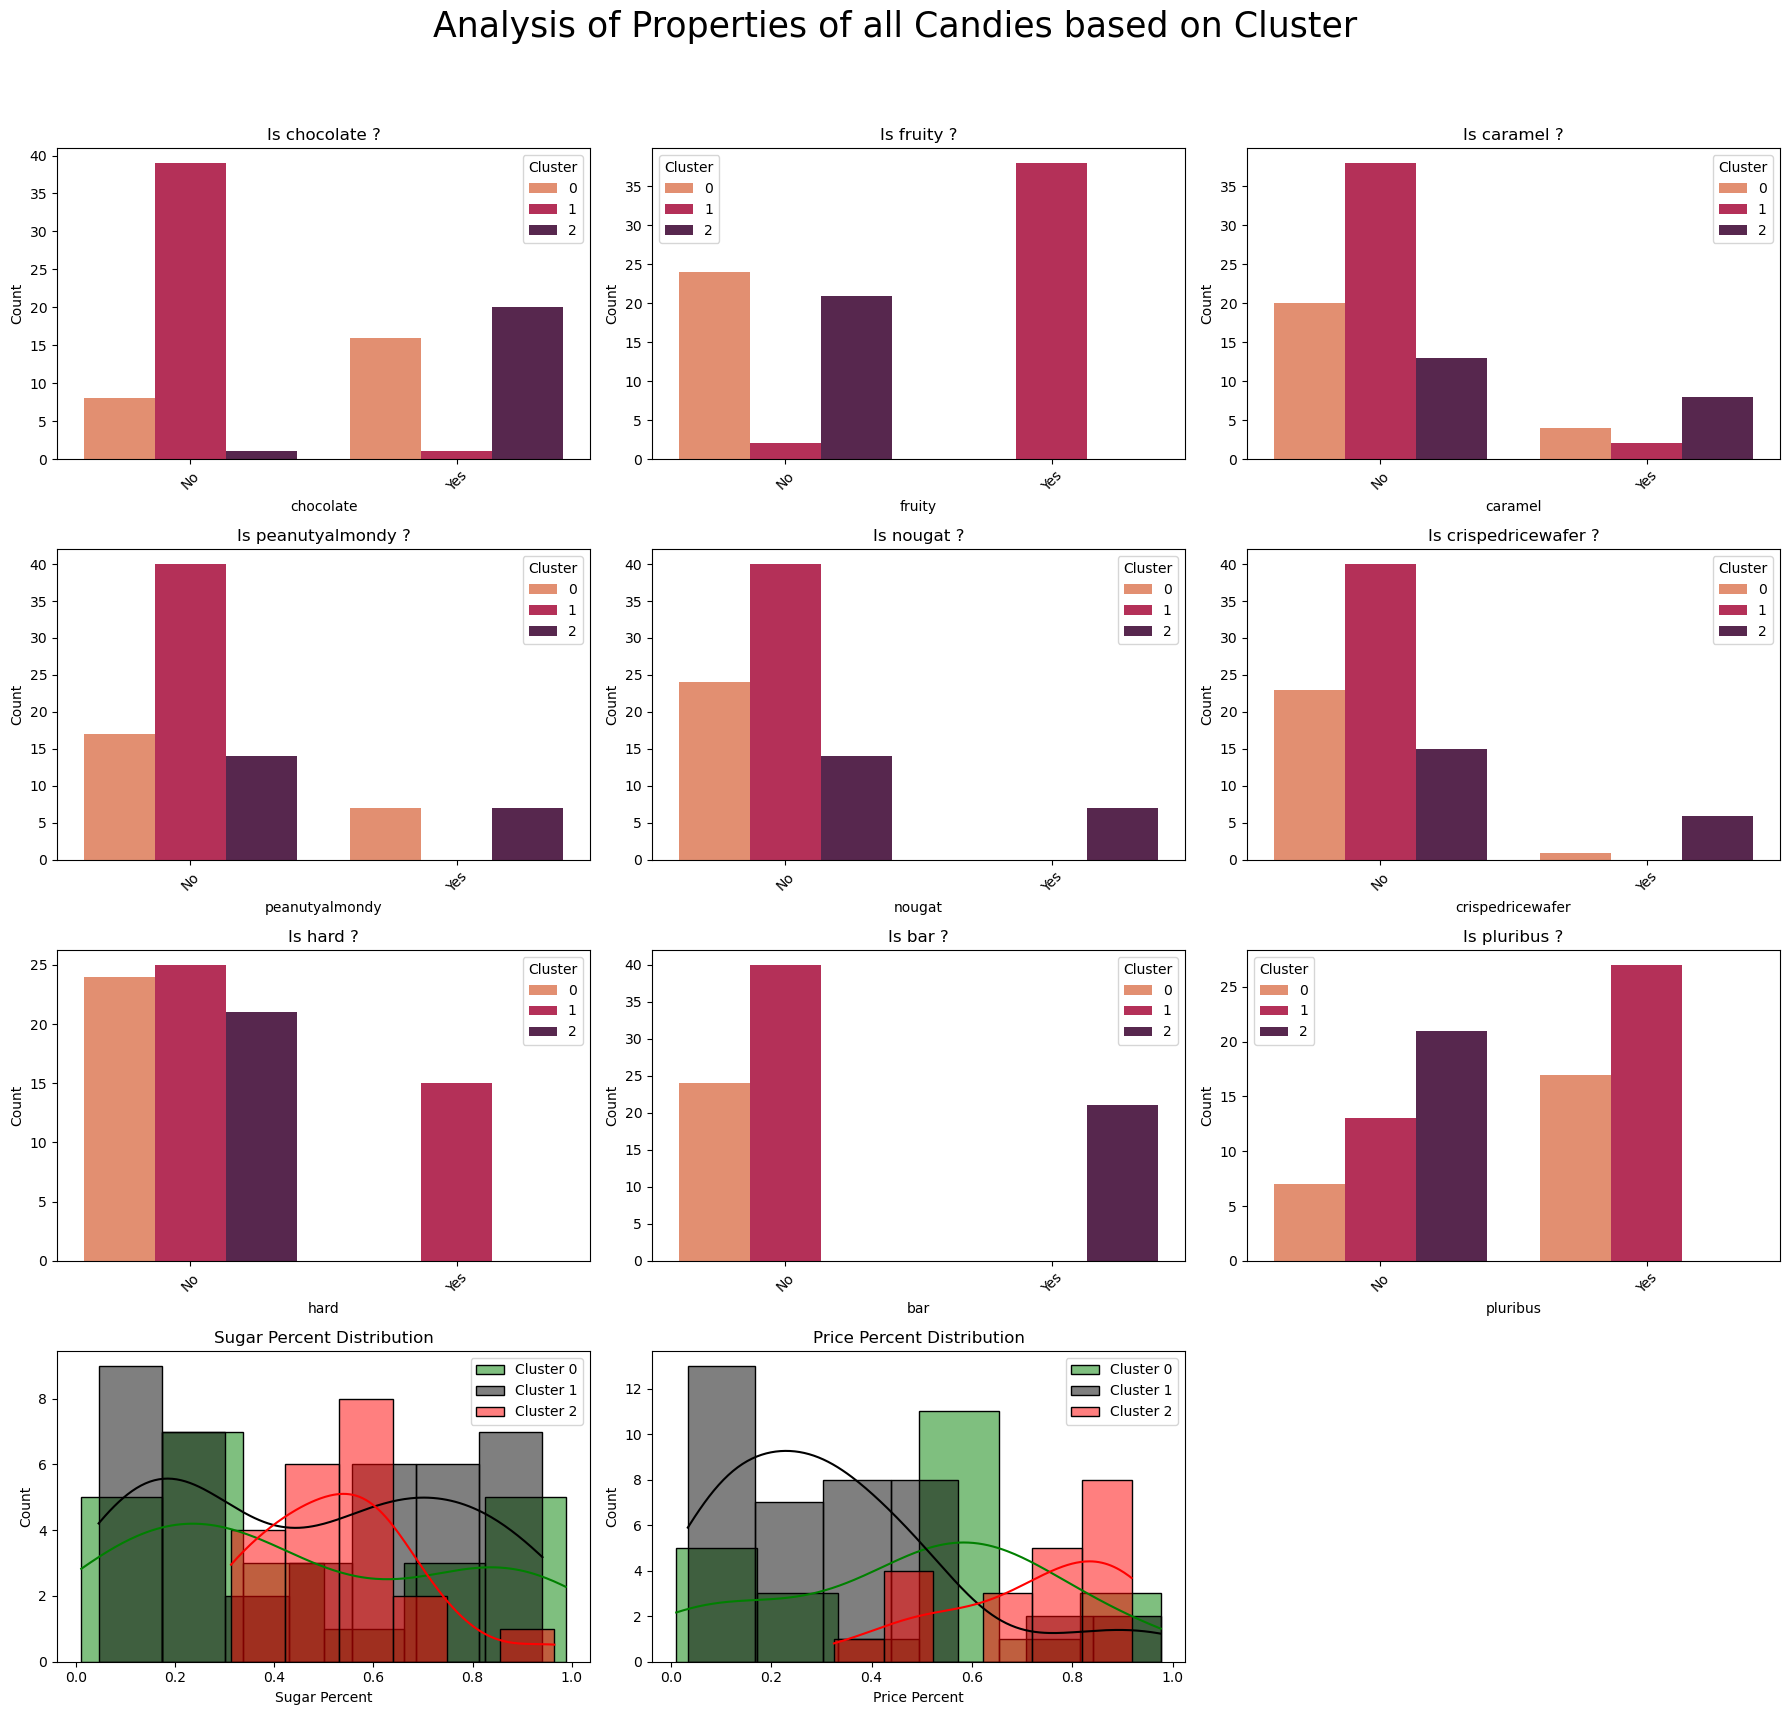

In [40]:
fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=df, ax=ax[i, j], palette='rocket_r', hue='Cluster')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels(['No', 'Yes'], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'Cluster'
for cluster_num, color in zip(range(3), ['green', 'black', 'red']):
    sns.histplot(df[df['Cluster'] == cluster_num]['sugarpercent'], ax=ax[3, 0], kde=True, color=color, label=f'Cluster {cluster_num}')
    sns.histplot(df[df['Cluster'] == cluster_num]['pricepercent'], ax=ax[3, 1], kde=True, color=color, label=f'Cluster {cluster_num}')

ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')
ax[3, 0].legend()
ax[3, 1].legend()

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Analysis of Properties of all Candies based on Cluster', fontsize=25, color='black')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
